# This is a test. 

___


## Obtaining

1. Sequencing coverage
2. Nucleotides frequencies
3. Most frequent nucleotides
4. The consensus sequence


## Saving all as a .csv file

In [7]:
exec (open("/Users/markov/dengue/scripts/functions.py").read ())
refgenome_file = "/Users/markov/dengue/data/pDVWSK601-NGC virus.gb"
#getting_cover_ntfreqs ("/Users/markov/dengue/data/twoway_noadapt6_rehead_sortindex.bam", "/Users/markov/dengue/data/denv_coverage_and_ntcounts_nopairs_noquality.csv", False, False)


In [76]:
counts_dataframe = pd.read_csv ("/Users/markov/dengue/data/denv_coverage_and_ntcounts2.csv")

correction = - getting_position_correction (refgenome_file, ''.join(counts_dataframe ['majorsequence']))
print (correction)

16138
-1846


Current figure size: [18.0, 8.0]


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


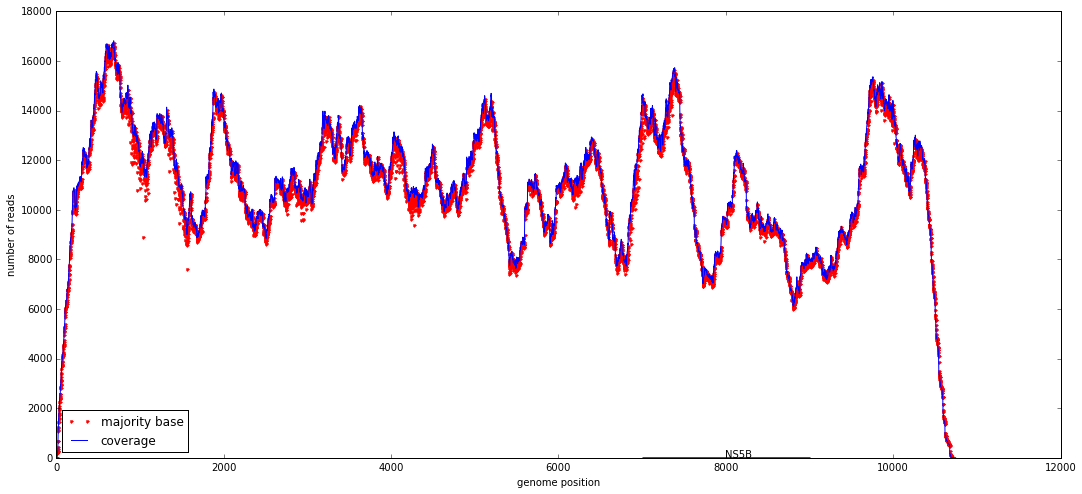

In [77]:

%matplotlib inline
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], counts_dataframe ['majorbases'], 'r.') #(position, coverage, 'r-')
plt.plot (counts_dataframe ['position'], counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns'], 'b-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(30, 7000, 9000, colors='r', linestyles='solid')
plt.text(8000,20,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


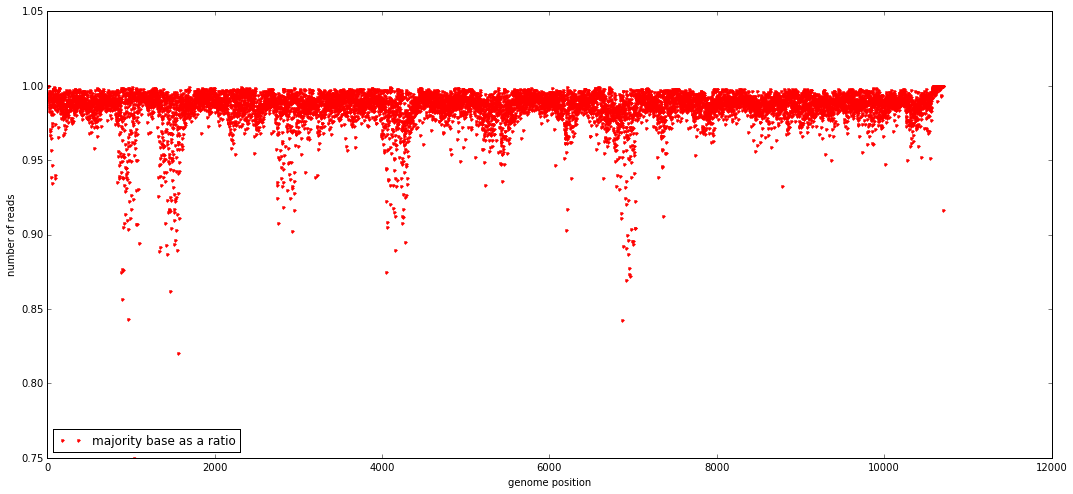

In [78]:
majorbase_ratio = list ()
coverage = counts_dataframe ['As'] + counts_dataframe ['Cs'] + counts_dataframe ['Gs'] + counts_dataframe ['Ts'] + counts_dataframe ['Ns']
majorbases = counts_dataframe ['majorbases']
for x in range (len(coverage)):
    majorbase_ratio.append (majorbases [x]/coverage[x])
    
def ratio(x,y):
    return x/y

majorbase_ratio = list(map(ratio, majorbases, coverage))

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], majorbase_ratio, 'r.') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['majority base as a ratio', 'coverage'], loc = 'lower left')

Current figure size: [18.0, 8.0]


/Users/pvmarkov/anaconda/lib/python3.5/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


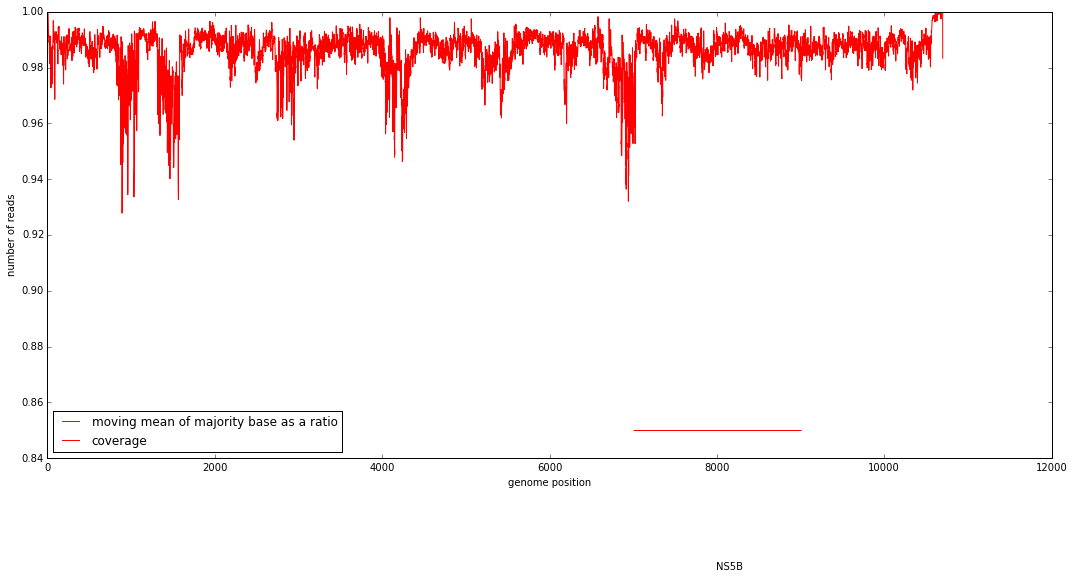

In [79]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
plt.hlines(0.85, 7000, 9000, colors='r', linestyles='solid') #, label='NS5B')
plt.text(8000,0.8,'NS5B',rotation=0)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower left')

# Title

In [80]:
import sys
annotations = '/Users/markov/dengue/data/ref_geno_anottation_relabel.gff'

try:
    f= open (annotations, 'r')
except IOError:
    print ("Unknown file " + annotations)
    sys.exit()
    
line = ""
annots_list = list ()
line_list = list ()
for l in f:
    if ('CDS' in l or 'UTR' in l) and 'DEN2' not in l and 'Beta-lactamase' not in l:
        line_list = l.split()
        annots_list.append (make_annotation (line_list [12], line_list [3], line_list [4], correction))
#        print (l)
#        print (line_list)
annots_list.sort (key=lambda x: x.start)
print (annots_list)
#print (annots_list [0].name)
#print (annots_list [0].start)
            

f.close()

[5UTR: 1 to 96, "Capsid": 97 to 438, "SP\prM": 397 to 438, "prM": 439 to 936, "M\(mature\form)": 712 to 936, E: 937 to 2421, "NS1": 2422 to 3477, "NS2A": 3478 to 4131, "NS2B": 4132 to 4521, "NS3": 4522 to 6375, "NS4A": 6376 to 6825, "NS4B": 6826 to 7569, "NS5": 7570 to 10272, 3UTR: 10273 to 10723]


1
2
0
1
2
0
1
2
0
1
2
0
1
2
Current figure size: [18.0, 8.0]


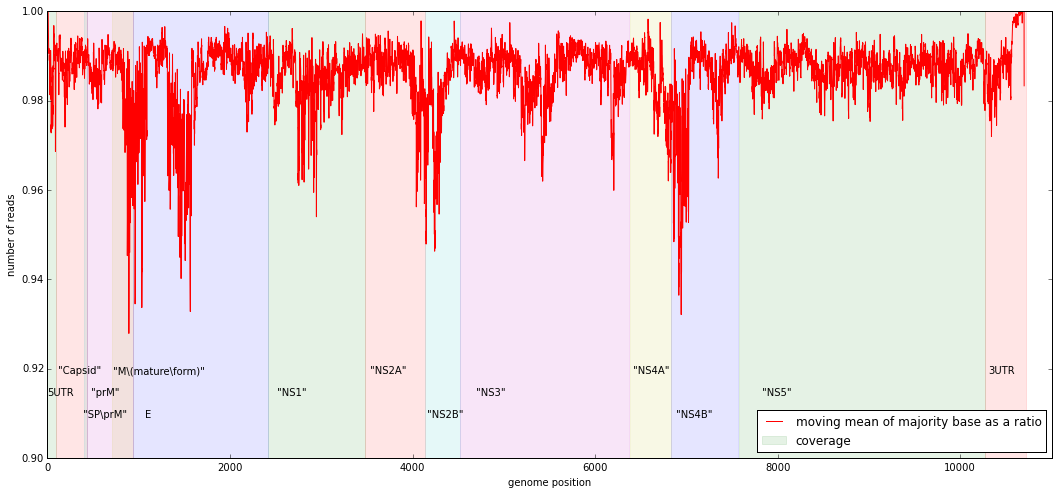

In [81]:
moving_average = (runningMeanFast (majorbase_ratio, 5))
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.plot (counts_dataframe ['position'], moving_average, 'r-') #(position, coverage, 'r-')
plt.xlabel ('genome position')
plt.ylabel ('number of reads')
axis_lower_limit = 0.9
plt.axis ([0, 11000, axis_lower_limit, 1])
color = 0.0
fcolor = list ('bgrcmybgrcmybgrcmybgrcmy')
color_counter = 0
#plt.axvspan(2000, 3000, ymin=0, ymax=1, alpha = 0.2)
#plt.axvspan(3500, 5000, ymin=0, ymax=1, facecolor = 'g', alpha = 0.5)
for gene in annots_list:
    color_counter +=1
    plt.axvspan(gene.start, gene.end, color = (fcolor [color_counter]), alpha = 0.1) #, label='NS5B')
    plt.text (gene.start + ((gene.end - gene.start)/10), axis_lower_limit + (axis_lower_limit/100) + (((1 - axis_lower_limit) /20) *(color_counter%3)) , gene.name, rotation=0)
    print (color_counter%3)
    color += 1/len(annots_list)
#for gene in annots_list:
#    plt.hlines((color/10)+ 0.8, gene.start, gene.end, colors= (0+color, 1-color, 0.8, 1), linestyles='solid') #, label='NS5B')
#    plt.text( (gene.start + gene.end)/2, (color/10)+ 0.8, gene.name, rotation=0)
#    color += 1/len(annots_list)
fig_size = rcParams["figure.figsize"]
print ("Current figure size:", fig_size)
plt.legend (['moving mean of majority base as a ratio', 'coverage'], loc = 'lower right')

In [82]:
codonpos1, codonpos2, codonpos3 = determin_codon_posit(annots_list[2], majorbase_ratio)


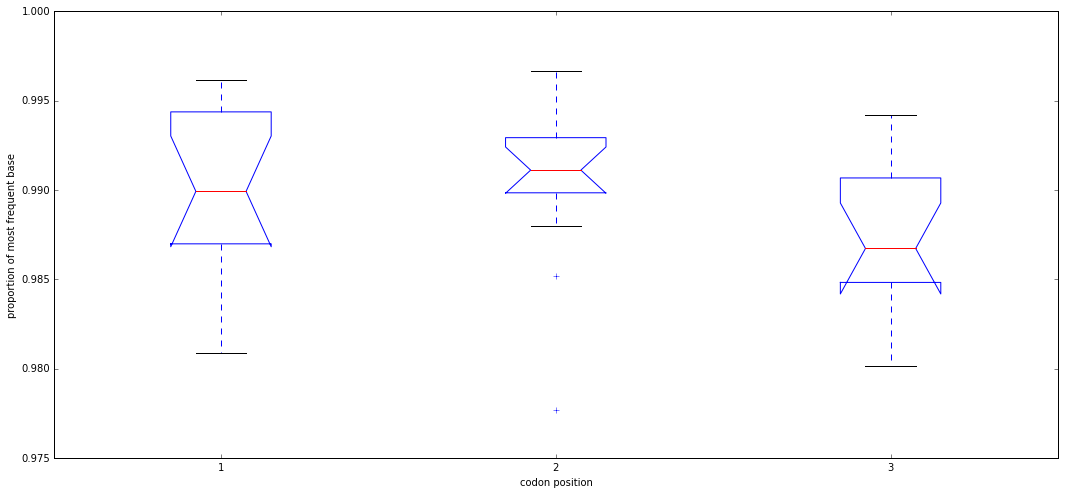

In [83]:
%matplotlib inline
rcParams['figure.figsize'] = 18, 8
plt.xlabel ('codon position')
plt.ylabel ('proportion of most frequent base')
#plt.axis ([0, 11000, 0.8, 1])
plt.boxplot([codonpos1, codonpos2, codonpos3], 1)
None # this removes lots of unwanted output that matplotlib throws out.


10723
"Capsid": 97 to 438
WilcoxonResult(statistic=2085.0, pvalue=0.0011418109562334544)
WilcoxonResult(statistic=2714.0, pvalue=0.14676768961927983)
"SP\prM": 397 to 438
WilcoxonResult(statistic=30.0, pvalue=0.27870738324960243)
WilcoxonResult(statistic=23.0, pvalue=0.11585149752593009)
"prM": 439 to 936
WilcoxonResult(statistic=5557.0, pvalue=0.035756785068797536)
WilcoxonResult(statistic=5250.0, pvalue=0.0093446566351896142)
"M\(mature\form)": 712 to 936
WilcoxonResult(statistic=1145.0, pvalue=0.19141496443680173)
WilcoxonResult(statistic=973.0, pvalue=0.02554833171324479)
E: 937 to 2421
WilcoxonResult(statistic=56075.0, pvalue=0.11110957662528413)
WilcoxonResult(statistic=59026.0, pvalue=0.50694979356238146)
"NS1": 2422 to 3477
WilcoxonResult(statistic=30080.0, pvalue=0.67103244817952978)
WilcoxonResult(statistic=29928.0, pvalue=0.67876822790004165)
"NS2A": 3478 to 4131
WilcoxonResult(statistic=9466.0, pvalue=0.010796495683631896)
WilcoxonResult(statistic=10932.0, pvalue=0.33403739

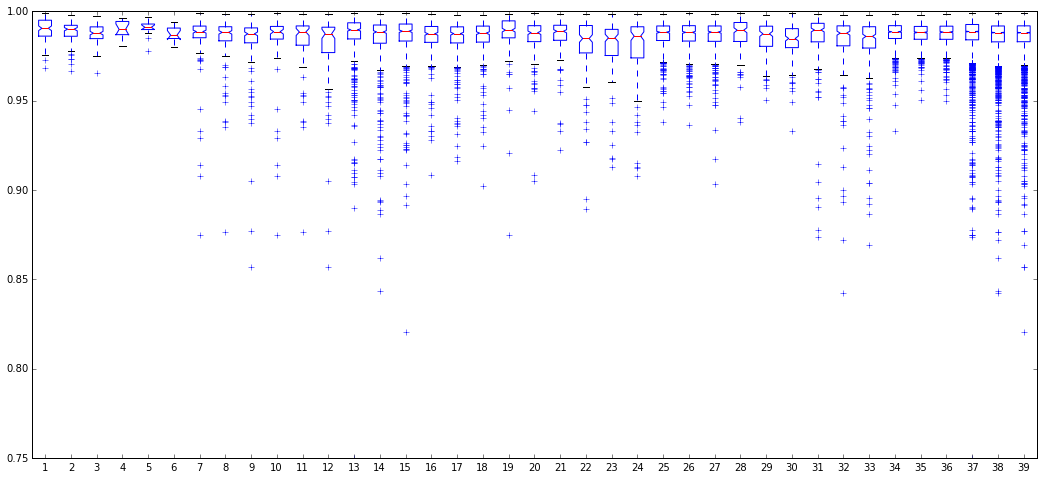

In [103]:
import scipy.stats
geneslist = list() 
print (len(majorbase_ratio))
#list1, list2, list3 = determin_codon_posit(x, majorbase_ratio)
global_list1 = list()
global_list2 = list()
global_list3 = list()
for x in annots_list:
    
    if x.start>0 and x.end< len(majorbase_ratio) and 'UTR' not in x.name:
        list1, list2, list3 = determin_codon_posit(x, majorbase_ratio) # provides three lists of majorbase_ratio values for positions 1, 2 and 3 over the length of segment x
        geneslist.append (list1) # these three commands create list of lists... 
        geneslist.append (list2) # ...created by appending list of values for codon position1, then 2, then 3 for each gene in turn...
        geneslist.append (list3) # ...as the loop goes through members of annots_list
        list1_pruned = list1[0:-1] 
        list2_pruned = list2[0:-1]
        global_list1.extend(list1_pruned) # these three create a list of values for...
        global_list2.extend(list2_pruned) # ... codon positions 1, 2 and 3 throughout...
        global_list3.extend(list3)        # ... the entire genome.
        print (x)
        print (scipy.stats.wilcoxon (list1_pruned, list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
        print (scipy.stats.wilcoxon (list2_pruned, list3)) # ...and pos2 vs. pos3 gene by gene

%matplotlib inline
rcParams['figure.figsize'] = 18, 8
#plt.xlabel ('genome position')
#plt.ylabel ('number of reads')
#plt.axis ([0, 11000, 0.8, 1])
print ("Across the genome")
print (scipy.stats.wilcoxon (global_list1, global_list3)) # Wilcoxon signed rank test on position 1 vs. position 3...
print (scipy.stats.wilcoxon (global_list2, global_list3)) # ...and pos2 vs. pos3 over entire genome

geneslist.append (global_list1) # adds the list of all-genome lists in positions 1, 2 and 3 to...
geneslist.append (global_list2) # ...the list of lists 'genelist', used to do the...
geneslist.append (global_list3) # ... boxplot below
plt.boxplot(geneslist, 1)

None